## Kmeans Clustering

In [1]:
## import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.preprocessing import scale

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
## loading data
df = pd.read_csv('data/final_df.csv')
df.head()

,id,gender,ever_married,graduated,work_experience,spending_score,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,age,family_size,anon_cat
0,462809,1,0,0,1,2.0,0,0,0,0,1,0,0,0,-1.341100,0.965040,-0.808370
1,462643,0,1,1,1,0.0,0,1,0,0,0,0,0,0,-0.331566,0.183083,-0.808370
2,466315,0,1,1,1,2.0,0,1,0,0,0,0,0,0,1.498214,-1.380831,0.600711
3,461735,1,1,1,0,1.0,0,0,0,0,0,0,1,0,1.498214,-0.598874,0.600711
4,462669,0,1,1,1,1.0,0,0,1,0,0,0,0,0,-0.205374,1.746997,0.600711


In [3]:
## checking shape of dataset
df.shape

(8068, 17)

In [4]:
## get origianl dataset 
orig_df = pd.read_csv('train.csv')
orig_df.columns = orig_df.columns.str.lower()


## Finding 

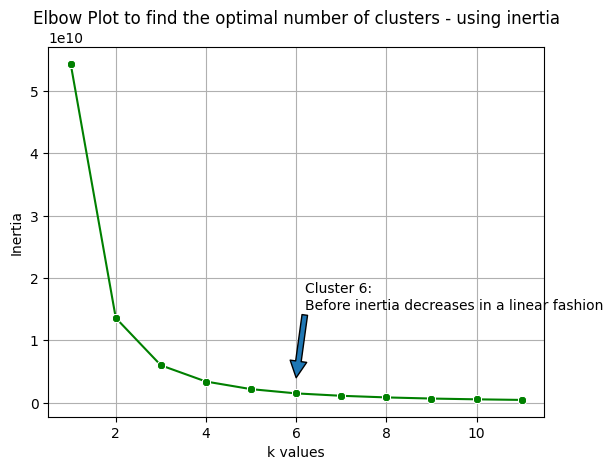

In [5]:
## plotting the inertia plot to find the best number of clusters
inertia_score = []
for k in range(1,12):
    kmeans = KMeans(n_clusters=k,n_init = 'auto')
    kmeans.fit(df)
    inertia_score.append(kmeans.inertia_)

#Visualizing the inertia vs k plot
#plt.figure(figsize=(10,6)) 
sns.lineplot(x=range(1,12),y=inertia_score,color='green',marker="8")  #Inertia: It is the sum of the squared distances of samples to their closest cluster center.
#plt.xticks(range(1,8))
plt.xlabel('k values')
plt.ylabel('Inertia')
plt.title('Elbow Plot to find the optimal number of clusters - using inertia')
plt.annotate('Cluster 6:\nBefore inertia decreases in a linear fashion',xy=(6,0.4*1e10),xytext=(6.2,1.5*1e10),arrowprops={})

plt.grid()
plt.show()

## the ideal number of clusters at the company should be 6 not 4

In [6]:
## fitting the KMeans model with k = 4 as our company has 4 clusters

kmeans = KMeans(n_clusters=4, init= 'random' , n_init=15)
kmeans.fit(df)
print("WCSS: ", kmeans.inertia_)
print("Iternations until converged: ", kmeans.n_iter_)
print("Final centroids: ")
print(kmeans.cluster_centers_)
print("Cluster assignments ")
print(kmeans.labels_)

#3 clusters WCSS: 5,998,966,957.04904
#4 clusters WCSS : 3,396,553,025.5270343
#5 clusters WCSS : 2,176,888,589.363191
#6 clusters WCSS : 217,6862,680.8593364 -> 6 clusters are the best 
#7 clusters WCSS : 1,110,079,518.487785

WCSS:  3396842091.776753
Iternations until converged:  14
Final centroids: 
[[ 4.64508230e+05  5.47856431e-01  6.05184447e-01  6.14656032e-01
   2.20887338e+00  1.29661017e+00  7.97607178e-02  1.22133599e-01
   1.08175474e-01  9.52143569e-02  1.53539382e-01  1.14656032e-02
   5.83250249e-02  4.18743769e-02 -1.37906726e-02  1.17205653e-01
  -4.27180774e-02]
 [ 4.62276731e+05  5.58662007e-01  5.95107339e-01  6.12081877e-01
   2.29505741e+00  1.31003495e+00  1.03344983e-01  8.28756865e-02
   1.03844234e-01  7.48876685e-02  1.64253620e-01  4.09385921e-02
   7.08936595e-02  3.24513230e-02 -2.61669984e-02  2.41934730e-02
   3.61637796e-02]
 [ 4.66806917e+05  5.43033761e-01  5.96766524e-01  6.34807418e-01
   2.41892534e+00  1.39752734e+00  8.36899667e-02  7.18021874e-02
   1.22206372e-01  6.60960533e-02  1.78792202e-01  3.80408940e-02
   8.41654779e-02  3.09082263e-02  1.52061186e-02 -6.97605297e-02
   3.82173672e-02]
 [ 4.60077482e+05  5.40388548e-01  5.73619632e-01  6.40081800e-01
   2.6232

In [7]:
## adding to original data the cluster's assignment at the last column

label = pd.DataFrame(kmeans.labels_, columns = ['labels']) # index to 
orig_df = pd.concat([orig_df,label],axis=1)
orig_df 

,id,gender,ever_married,age,graduated,profession,work_experience,spending_score,family_size,var_1,segmentation,labels
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,1
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,1
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,2
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,1
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D,0
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D,0
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D,0
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B,2


In [8]:
## number of data points for each cluster
orig_df.labels.value_counts()

labels
2    2101
0    2005
1    2003
3    1959
Name: count, dtype: int64

In [9]:
## converting labels 0-3 to A-D
orig_df['labels'] = orig_df['labels'].replace({0:'A',1:'B', 2:'C', 3:'D'})
orig_df

,id,gender,ever_married,age,graduated,profession,work_experience,spending_score,family_size,var_1,segmentation,labels
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,B
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,B
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,C
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D,A
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D,A
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D,A
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B,C


In [10]:
## examples of records in cluster A
clusterA = orig_df[orig_df['labels']=='A']
clusterA



,id,gender,ever_married,age,graduated,profession,work_experience,spending_score,family_size,var_1,segmentation,labels
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D,A
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D,A
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C,A
10,464041,Female,No,26,Yes,Engineer,1.0,Low,3.0,Cat_6,A,A
11,464942,Male,No,19,No,Healthcare,4.0,Low,4.0,Cat_4,D,A
...,...,...,...,...,...,...,...,...,...,...,...,...
8060,463613,Female,Yes,48,Yes,Artist,0.0,Average,6.0,Cat_6,A,A
8061,465231,Male,Yes,65,No,Artist,0.0,Average,2.0,Cat_6,C,A
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D,A
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D,A


In [11]:
true = orig_df[orig_df['segmentation'] == orig_df['labels']]
true

,id,gender,ever_married,age,graduated,profession,work_experience,spending_score,family_size,var_1,segmentation,labels
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,B
10,464041,Female,No,26,Yes,Engineer,1.0,Low,3.0,Cat_6,A,A
17,461644,Male,No,31,No,Healthcare,1.0,Low,6.0,Cat_6,B,B
21,459675,Female,No,18,No,Healthcare,3.0,Low,4.0,Cat_6,D,D
22,465602,Male,Yes,33,Yes,Artist,13.0,Low,2.0,Cat_3,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...
8052,467455,Female,No,37,Yes,Artist,8.0,Low,2.0,Cat_6,C,C
8059,460132,Male,No,39,Yes,Healthcare,3.0,Low,2.0,Cat_6,D,D
8060,463613,Female,Yes,48,Yes,Artist,0.0,Average,6.0,Cat_6,A,A
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B,B


In [12]:
len(true)/len(df)



0.2617749132374814

The accuracy is at 26% so not good enough.

Go to 4_experimentation.ipynb where I have changed the way the data is cleaned and found the highest accuracy.